In [202]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [203]:
# Libraries To Use
from __future__ import division 
from CloudQuant import MiniSimulator 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import os
from sklearn import linear_model
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [205]:
%matplotlib inline

In [206]:
path_name = 'D:/cStrategy/BackTestResult/5f67dcb85a744ea1a11aa355a6576844/'
path = ff.data_path

In [207]:
filename = 'dealList.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [208]:
benchMarkIndex = '000300.SH'

In [209]:
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[benchMarkIndex]

In [210]:
benchMarkMonthly = benchMarkData.resample('M').last()

In [211]:
inforDF = pd.read_csv(path_name+filename,infer_datetime_format=True,parse_dates=[0])
inforDF['TRADE_TIME'] = inforDF['TRADE_TIME'].apply(lambda x: str(x)[:8])
inforDF['TRADE_TIME'] = pd.to_datetime(inforDF['TRADE_TIME'], format='%Y%m%d', errors='ignore')

In [212]:
inforDFBuy = inforDF[inforDF['TRADE_TYPE'] == 1]

In [213]:
BuySeries = inforDFBuy.set_index('TRADE_TIME').resample('M').size()

In [214]:
compareDF = pd.concat([benchMarkMonthly, BuySeries], axis=1, join='inner')
compareDF.rename(columns = {0:'Buy_count'},inplace=True)
#compareDF['Buy_count']

In [215]:
compareDF .head()

,000300.SH,Buy_count
LZ_GPA_INDXQUOTE_CLOSE-d,,
2009-01-31,2032.682,8
2009-02-28,2140.489,0
2009-03-31,2507.789,23
2009-04-30,2622.926,3
2009-05-31,2759.712,14


In [216]:
compareDF['Buy_count'].corr(compareDF[benchMarkIndex],method='spearman')

-0.049285004016831904

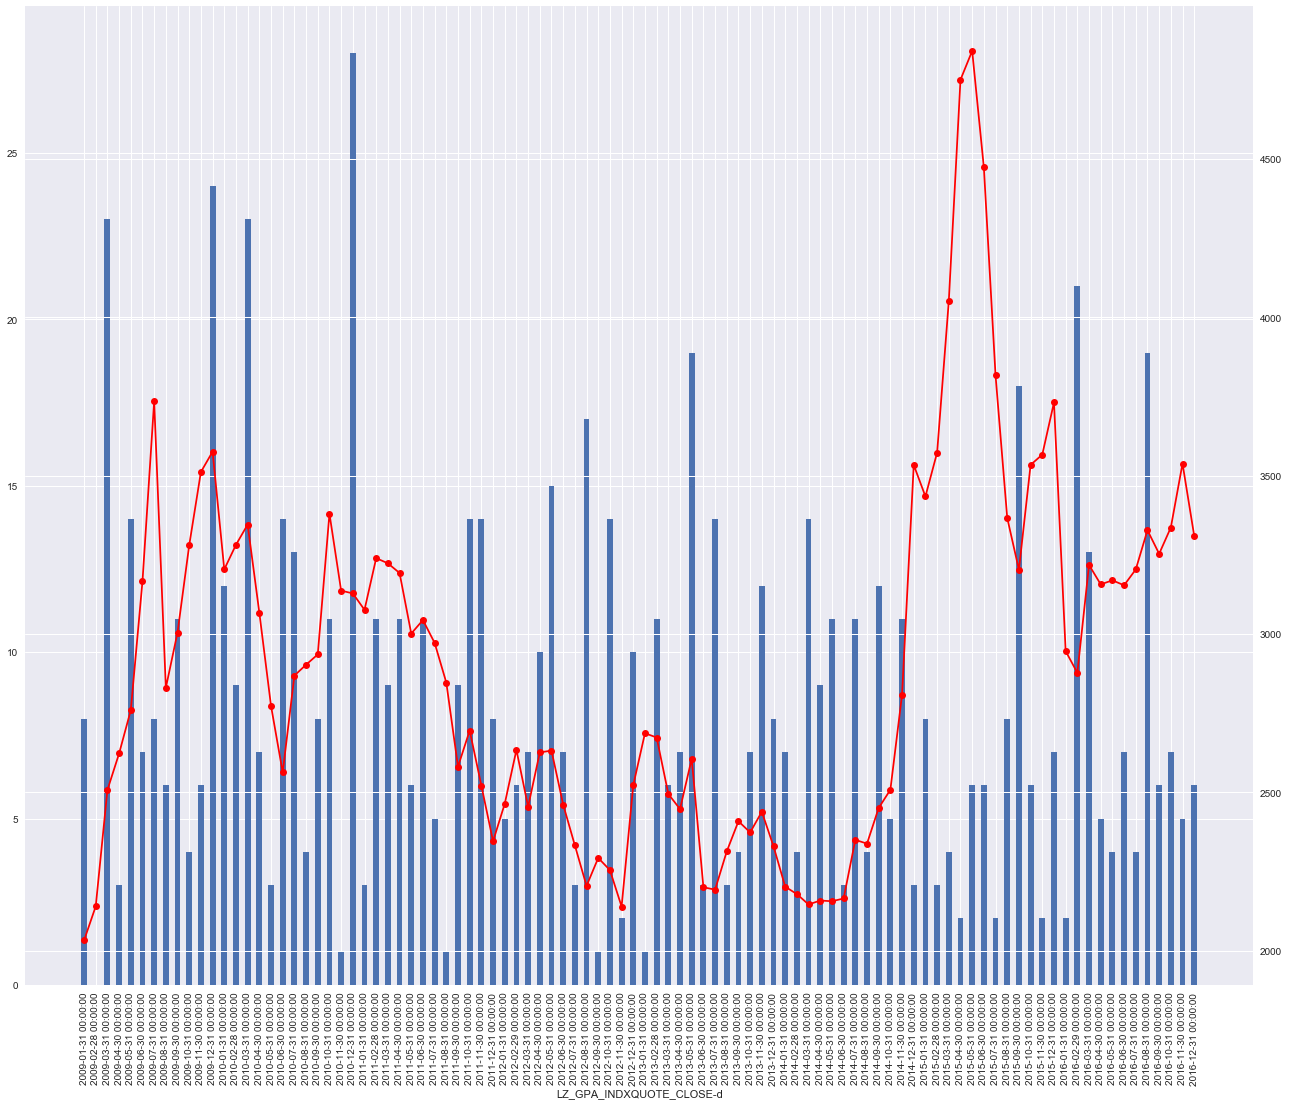

In [217]:
# Plot bar and line in same figure
fig = plt.figure(figsize=(22,18))
ax = compareDF['Buy_count'].plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),compareDF[benchMarkIndex],marker='o',color ='r')

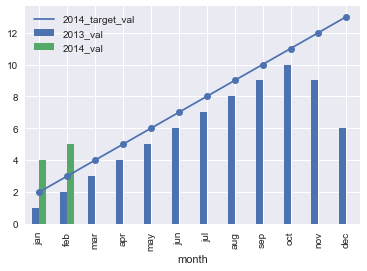

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

left_2013 = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6]})

right_2014 = pd.DataFrame({'month': ['jan', 'feb'], '2014_val': [4, 5]})

right_2014_target = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['month', '2014_target_val']].plot(
    x='month', linestyle='-', marker='o')
df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
                                                        ax=ax)

plt.show()

In [220]:
inforDF.set_index('TRADE_TIME').resample('M').last()

,CODE,VOLUME,PRICE,TRADE_TYPE,POSITION_AVG_PRICE,COMMISSION
TRADE_TIME,,,,,,
2009-01-31,002047,138100,3.62,1,3.625430,0.0
2009-02-28,600823,61300,8.16,-1,8.162225,0.0
2009-03-31,600697,33300,15.15,1,15.172725,0.0
2009-04-30,600867,30800,16.40,1,16.424600,0.0
2009-05-31,600859,22400,22.68,1,22.714020,0.0
2009-06-30,600707,155200,5.38,-1,3.224830,0.0
2009-07-31,000404,99300,6.50,-1,5.097635,0.0
2009-08-31,600824,76500,6.95,1,6.960425,0.0
2009-09-30,002109,56300,9.10,-1,9.494220,0.0
